In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=3bc48ca29a0c110543ee0d61ab37bc899641b3a941976fc245c2f080a8cb879c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
pip install py4j

In [3]:
pip install findspark

# LOADING OF DATASETS

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
pwd

'/content'

# Read CSV Files Using Spark

## IMPORTING OF  PACKAGES, LIBRARIES,FUNCTIONS, MODULES

In [5]:
import findspark
findspark.init()

In [7]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, isnull, col, size, when
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev

# Initialize Spark Session
spark = SparkSession.builder.appName("DatasetAnalysis").getOrCreate()

# Reading the data
dim_customer_df = spark.read.csv("drive/My Drive/BigDataProcessing/DimCustomer.csv", header=True, inferSchema=True)
dim_product_df = spark.read.csv("drive/My Drive/BigDataProcessing/DimProduct.csv", header=True, inferSchema=True)
fact_internet_sales_df = spark.read.csv("drive/My Drive/BigDataProcessing/FactInternetSales.csv", header=True, inferSchema=True)

# Descriptive statistics
dim_customer_df.describe().show()
dim_product_df.describe().show()
fact_internet_sales_df.describe().show()

# Understanding relationships (example: joining DimCustomer and FactInternetSales)
joined_df = fact_internet_sales_df.join(dim_customer_df, fact_internet_sales_df.CustomerKey == dim_customer_df.CustomerKey)
joined_df.show()

+-------+-----------------+------------------+--------------------+-----+---------+----------+--------+-------------+------+------+--------------------+------------------+------------------+--------------------+-------------------+--------------------+---------------+-----------------+-----------------+----------------+-------------------+------------------+--------------------+-----------------+-------------------+---------------+
|summary|      CustomerKey|      GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|MaritalStatus|Suffix|Gender|        EmailAddress|      YearlyIncome|     TotalChildren|NumberChildrenAtHome|   EnglishEducation|    SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|     HouseOwnerFlag|   NumberCarsOwned|        AddressLine1|     AddressLine2|              Phone|CommuteDistance|
+-------+-----------------+------------------+--------------------+-----+---------+----------+--------+-------------+------+----

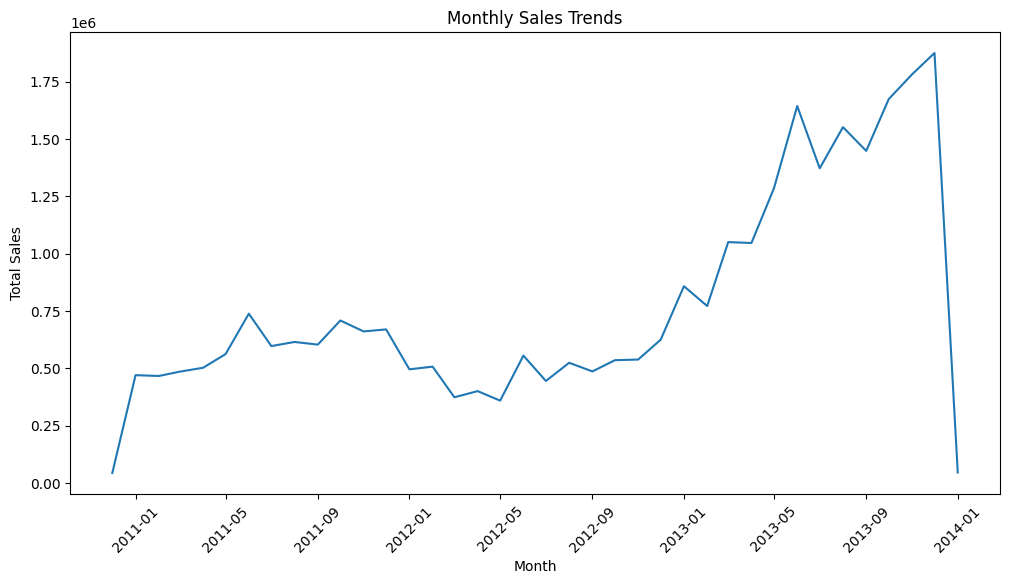

In [9]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Renaming the 'ï»¿ProductKey' column in fact_internet_sales_df to 'ProductKey'
fact_internet_sales_df = fact_internet_sales_df.withColumnRenamed('ï»¿ProductKey', 'ProductKey')

# Joining the tables
combined_df = fact_internet_sales_df.join(dim_customer_df, "CustomerKey").join(dim_product_df, "ProductKey")

# Converting to Pandas DataFrame for visualization (assuming the data is small enough)
combined_pd_df = combined_df.toPandas()

# Visualization 1: Monthly Sales Trends
combined_pd_df['OrderDate'] = pd.to_datetime(combined_pd_df['OrderDate'])
monthly_sales = combined_pd_df.groupby(combined_pd_df['OrderDate'].dt.to_period('M'))['SalesAmount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

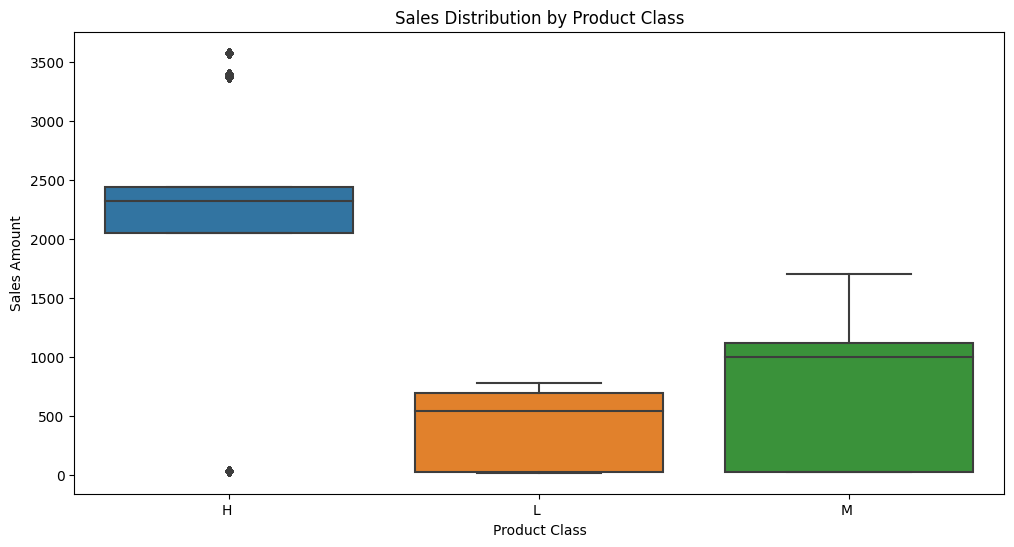

In [10]:
# Visualization 2: Sales Distribution by Product Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='SalesAmount', data=combined_pd_df)
plt.title('Sales Distribution by Product Class')
plt.xlabel('Product Class')
plt.ylabel('Sales Amount')
plt.show()

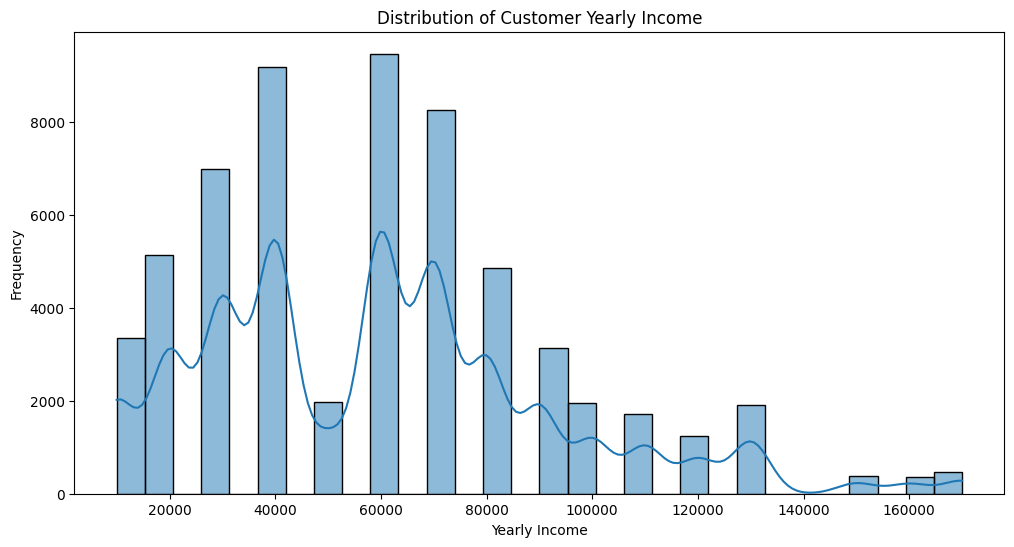

In [11]:
# Insight 3: Customer Yearly Income Distribution
plt.figure(figsize=(12, 6))
sns.histplot(combined_pd_df['YearlyIncome'], bins=30, kde=True)
plt.title('Distribution of Customer Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()

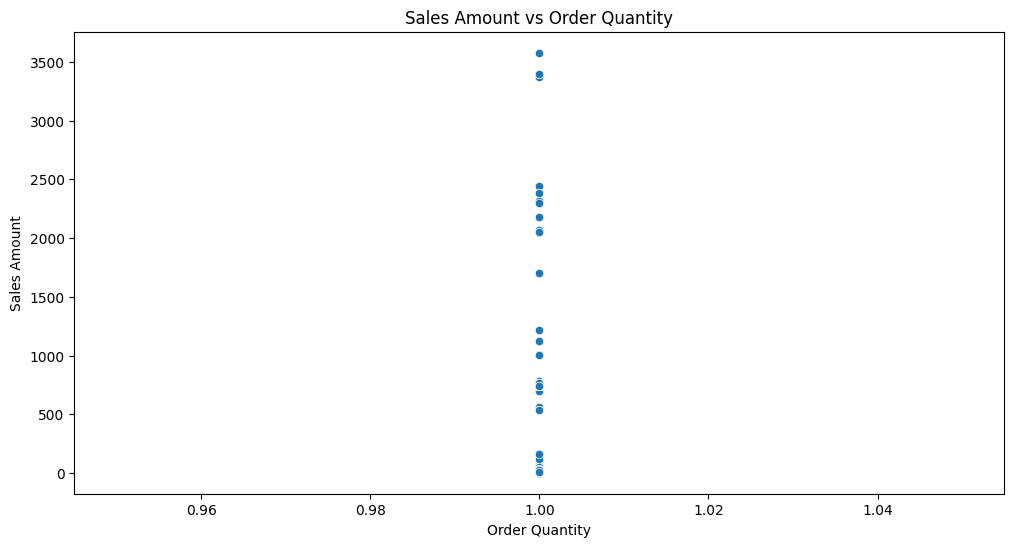

In [12]:
# Insight 4: Sales Amount vs Order Quantity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='OrderQuantity', y='SalesAmount', data=combined_pd_df)
plt.title('Sales Amount vs Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Sales Amount')
plt.show()

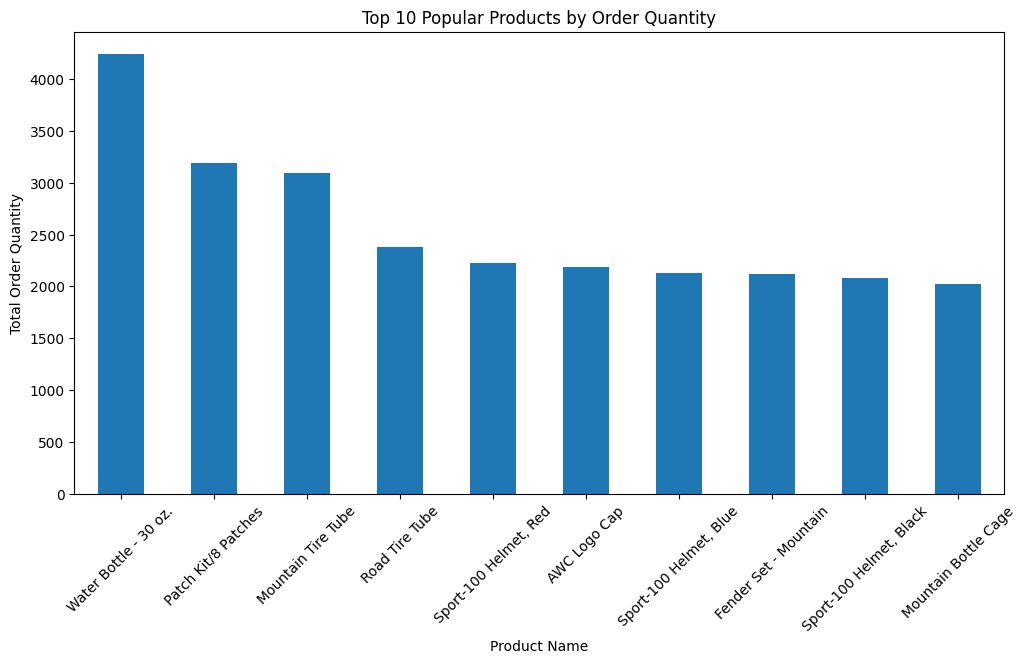

In [13]:
# Insight 5: Product Popularity by Order Quantity
top_products = combined_pd_df.groupby('EnglishProductName')['OrderQuantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Popular Products by Order Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.show()

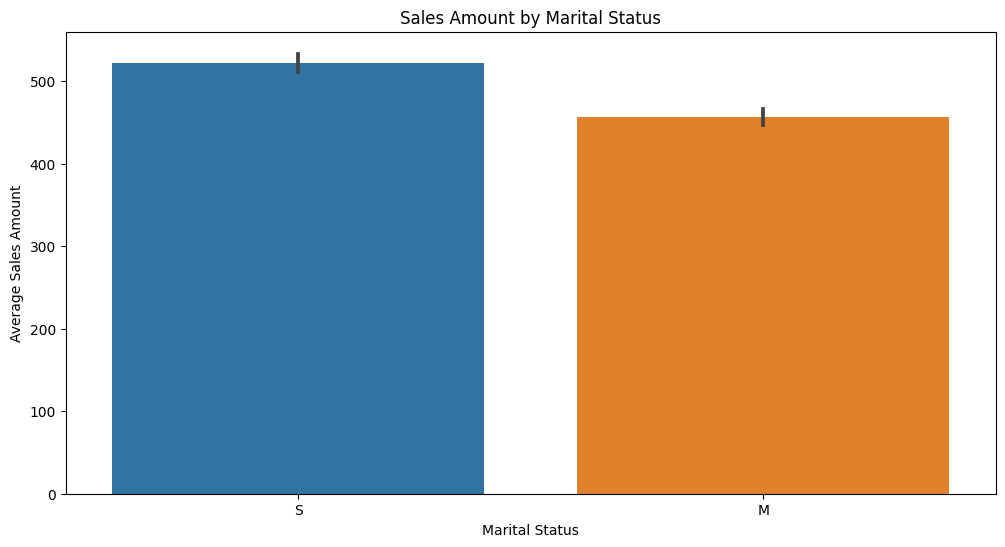

In [14]:
# Insight 6: Sales Amount by Marital Status
plt.figure(figsize=(12, 6))
sns.barplot(x='MaritalStatus', y='SalesAmount', data=combined_pd_df)
plt.title('Sales Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Sales Amount')
plt.show()

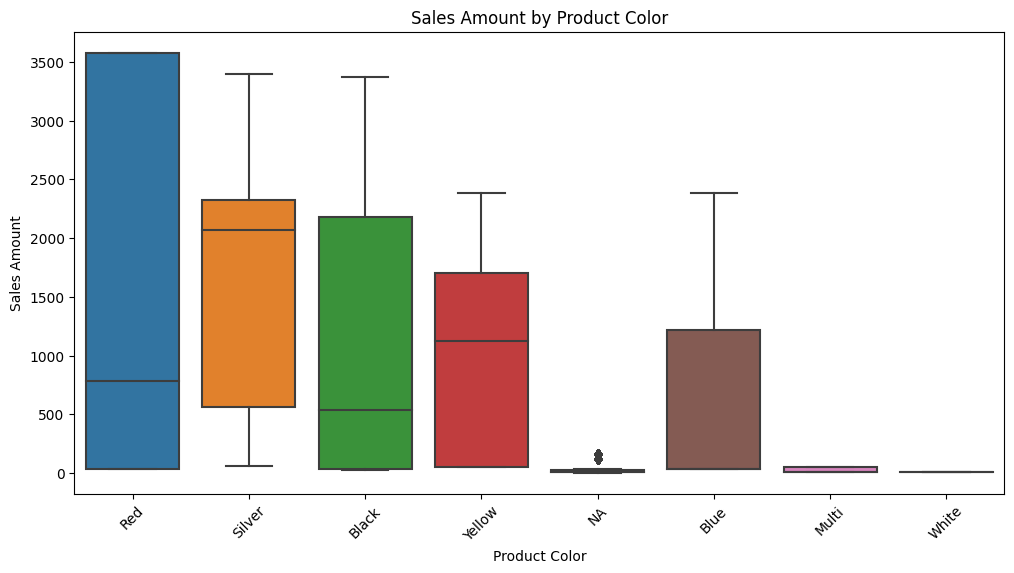

In [15]:
# Insight 7: Sales Amount by Product Color
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='SalesAmount', data=combined_pd_df)
plt.title('Sales Amount by Product Color')
plt.xlabel('Product Color')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

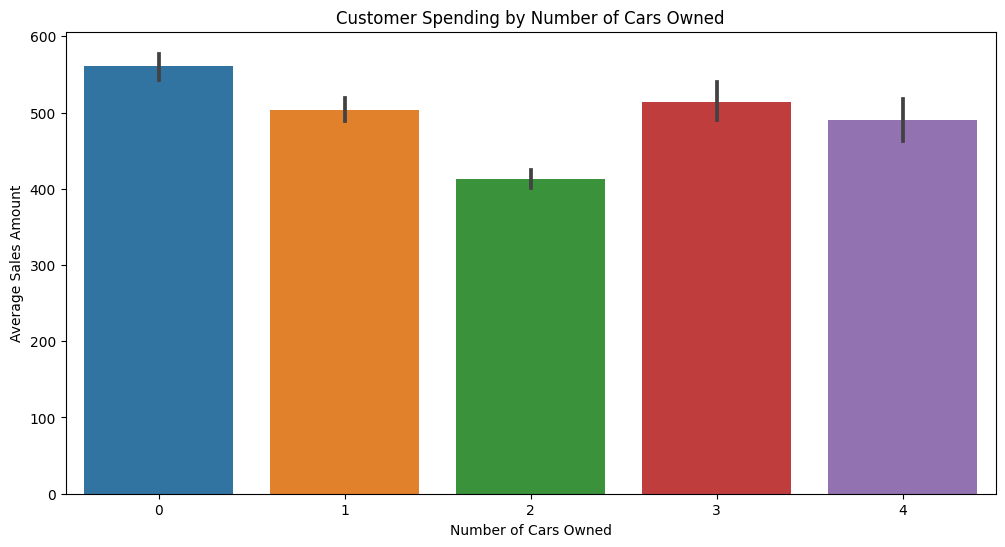

In [16]:
# Insight 8: Customer Spending by Number of Cars Owned
plt.figure(figsize=(12, 6))
sns.barplot(x='NumberCarsOwned', y='SalesAmount', data=combined_pd_df)
plt.title('Customer Spending by Number of Cars Owned')
plt.xlabel('Number of Cars Owned')
plt.ylabel('Average Sales Amount')
plt.show()

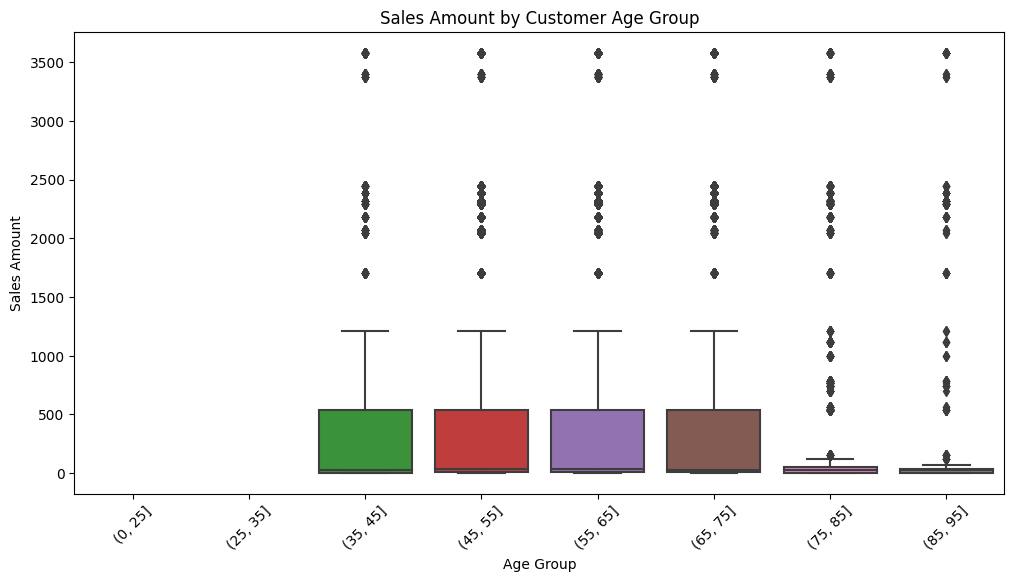

In [17]:
# For Insight 9, we first need to calculate the age of customers
combined_pd_df['Age'] = (pd.to_datetime('today') - pd.to_datetime(combined_pd_df['BirthDate'])).dt.days // 365

# Insight 9: Sales Amount by Customer Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(combined_pd_df['Age'], bins=[0, 25, 35, 45, 55, 65, 75, 85, 95]), y='SalesAmount', data=combined_pd_df)
plt.title('Sales Amount by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

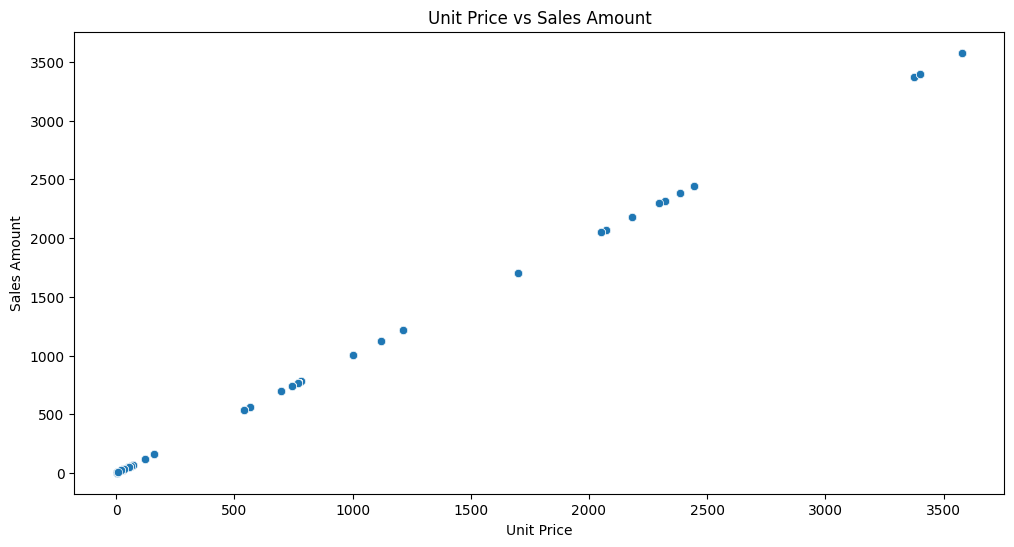

In [18]:
# Insight 10: Relationship between Unit Price and Sales Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UnitPrice', y='SalesAmount', data=combined_pd_df)
plt.title('Unit Price vs Sales Amount')
plt.xlabel('Unit Price')
plt.ylabel('Sales Amount')
plt.show()

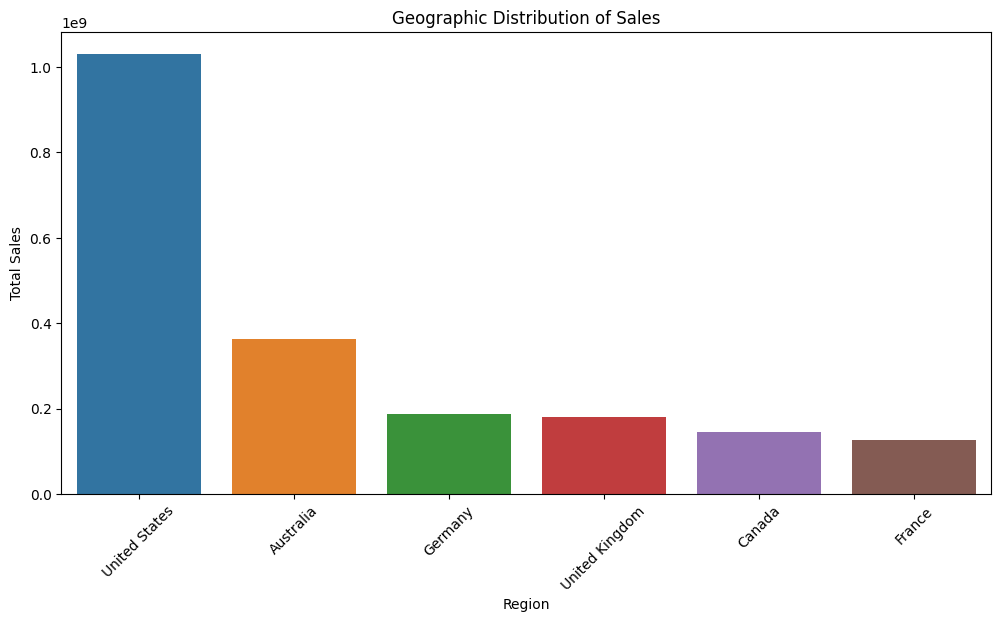

In [19]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("DatasetAnalysis").getOrCreate()

# Load datasets
dim_geography_df = spark.read.csv("drive/My Drive/BigDataProcessing/DimGeography.csv", header=True, inferSchema=True)
fact_internet_sales_df = spark.read.csv("drive/My Drive/BigDataProcessing/FactInternetSales.csv", header=True, inferSchema=True)

# Join datasets
geo_sales_df = fact_internet_sales_df.join(dim_geography_df, "SalesTerritoryKey")

# Aggregate sales by region
sales_by_region = geo_sales_df.groupBy("EnglishCountryRegionName").sum("SalesAmount").orderBy("sum(SalesAmount)", ascending=False)

# Convert to Pandas for visualization
pd_sales_by_region = sales_by_region.toPandas()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='EnglishCountryRegionName', y='sum(SalesAmount)', data=pd_sales_by_region)
plt.title('Geographic Distribution of Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


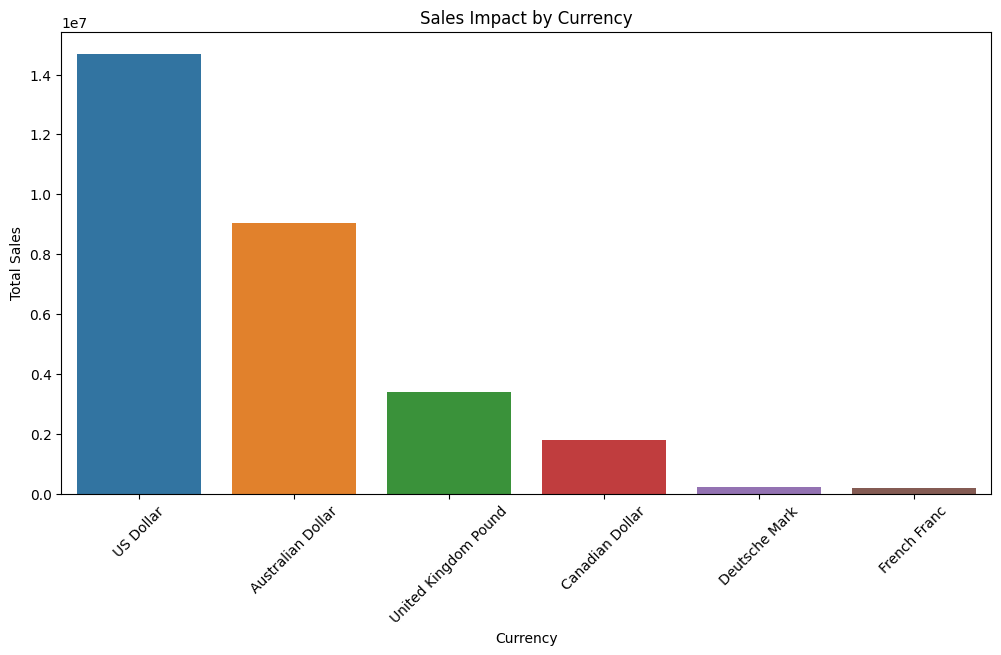

In [20]:
dim_currency_df = spark.read.csv("drive/My Drive/BigDataProcessing/DimCurrency.csv", header=True, inferSchema=True)

currency_sales_df = fact_internet_sales_df.join(dim_currency_df, "CurrencyKey")

sales_by_currency = currency_sales_df.groupBy("CurrencyName").sum("SalesAmount").orderBy("sum(SalesAmount)", ascending=False)

pd_sales_by_currency = sales_by_currency.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='CurrencyName', y='sum(SalesAmount)', data=pd_sales_by_currency)
plt.title('Sales Impact by Currency')
plt.xlabel('Currency')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [21]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("DatasetAnalysis").getOrCreate()

# Paths to your datasets
fact_sales_targets_path = "drive/My Drive/BigDataProcessing/FactSalesTargets.csv"
fact_internet_sales_path = "drive/My Drive/BigDataProcessing/FactInternetSales.csv"
dim_product_category_path = "drive/My Drive/BigDataProcessing/DimProductCategory.csv"
dim_customer_path = "drive/My Drive/BigDataProcessing/DimCustomer.csv"

# Load datasets
fact_sales_targets_df = spark.read.csv(fact_sales_targets_path, header=True, inferSchema=True)
fact_internet_sales_df = spark.read.csv(fact_internet_sales_path, header=True, inferSchema=True)
dim_product_category_df = spark.read.csv(dim_product_category_path, header=True, inferSchema=True)
dim_customer_df = spark.read.csv(dim_customer_path, header=True, inferSchema=True)

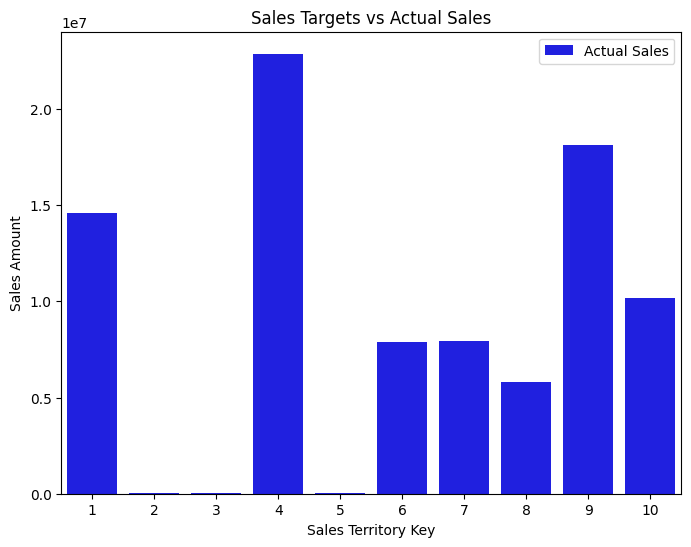

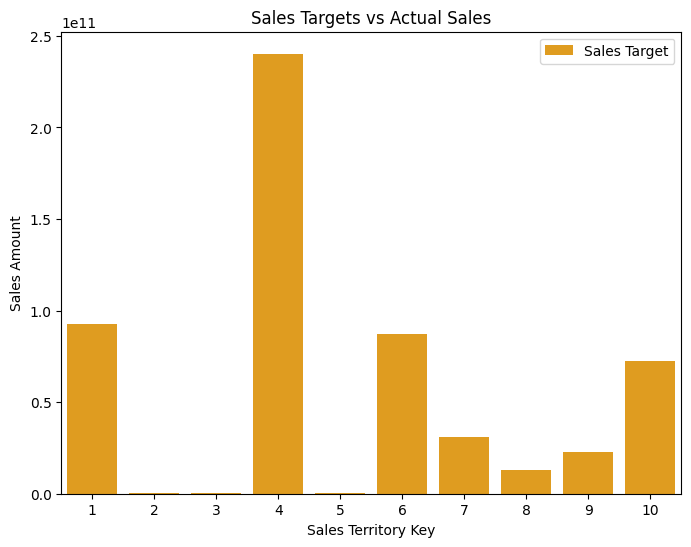

In [22]:
# Joining FactInternetSales with FactSalesTargets
sales_targets_vs_actual = fact_internet_sales_df.join(fact_sales_targets_df, "SalesTerritoryKey")
sales_targets_vs_actual = sales_targets_vs_actual.groupBy("SalesTerritoryKey").sum("SalesAmount", "SalesAmountQuote")
pd_sales_targets_vs_actual = sales_targets_vs_actual.toPandas()

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='SalesTerritoryKey', y='sum(SalesAmount)', data=pd_sales_targets_vs_actual, color='blue', label='Actual Sales')
plt.title('Sales Targets vs Actual Sales')
plt.xlabel('Sales Territory Key')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(x='SalesTerritoryKey', y='sum(SalesAmountQuote)', data=pd_sales_targets_vs_actual, color='orange', label='Sales Target')
plt.title('Sales Targets vs Actual Sales')
plt.xlabel('Sales Territory Key')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

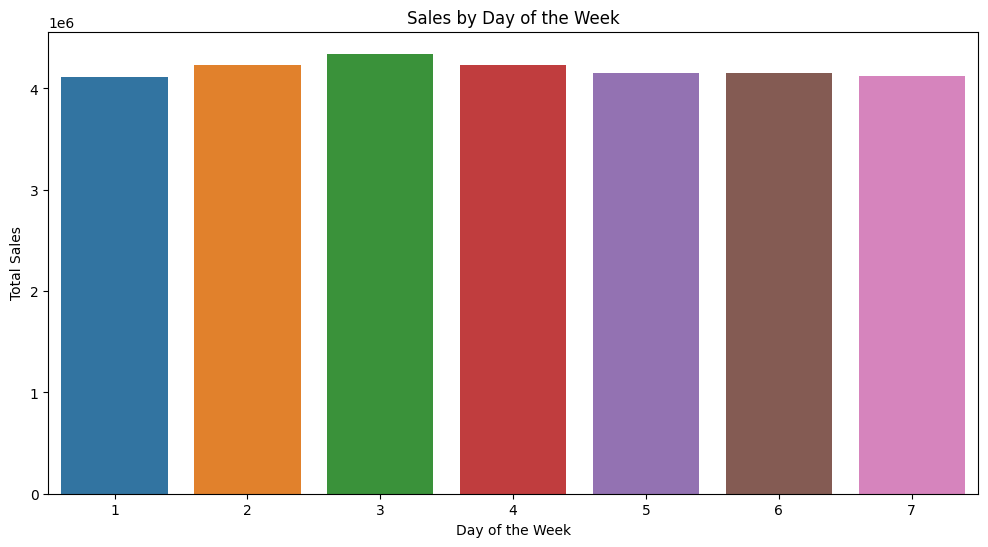

In [23]:
from pyspark.sql.functions import dayofweek

# Extracting day of the week
fact_internet_sales_df = fact_internet_sales_df.withColumn("DayOfWeek", dayofweek("OrderDate"))

# Aggregate sales by day of the week
sales_by_day = fact_internet_sales_df.groupBy("DayOfWeek").sum("SalesAmount")
pd_sales_by_day = sales_by_day.toPandas()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='sum(SalesAmount)', data=pd_sales_by_day)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


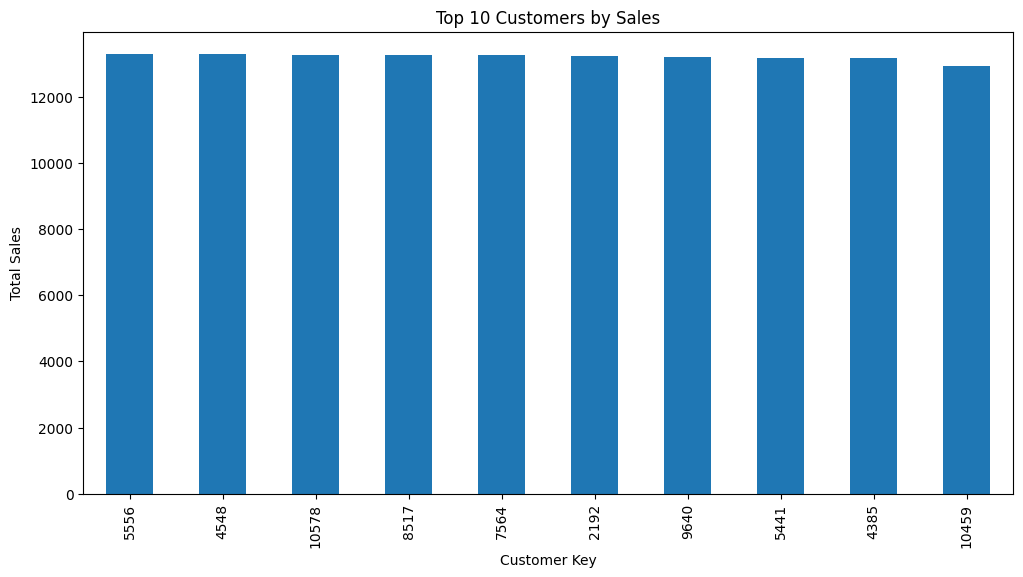

In [24]:
# Aggregate sales by customer
sales_by_customer = fact_internet_sales_df.groupBy("CustomerKey").sum("SalesAmount")
pd_sales_by_customer = sales_by_customer.toPandas()

# Visualization
plt.figure(figsize=(12, 6))
pd_sales_by_customer['sum(SalesAmount)'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Key')
plt.ylabel('Total Sales')
plt.show()


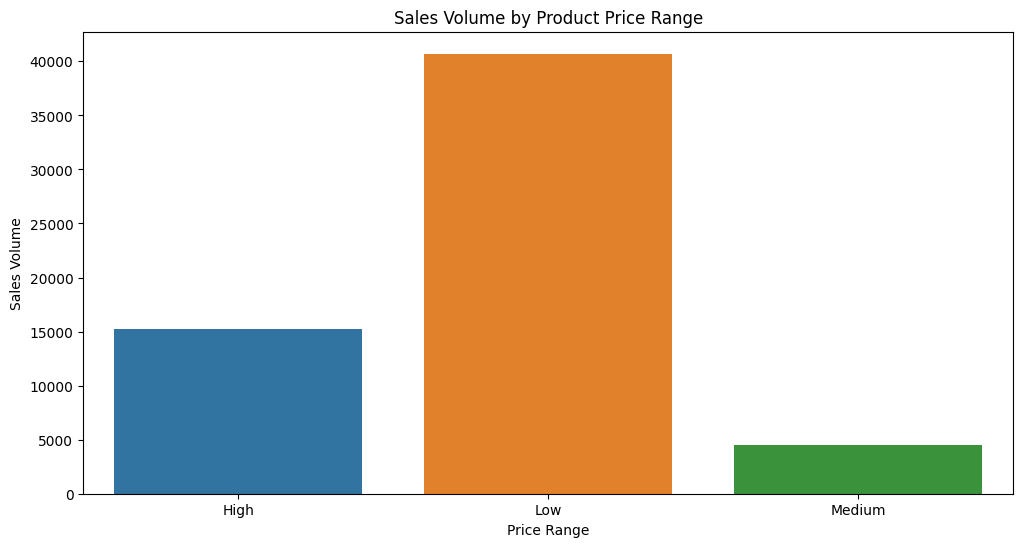

In [25]:
from pyspark.sql.functions import when

# Categorize products into price ranges
fact_internet_sales_df = fact_internet_sales_df.withColumn("PriceRange", when(fact_internet_sales_df.UnitPrice < 50, "Low")
                                                          .when((fact_internet_sales_df.UnitPrice >= 50) & (fact_internet_sales_df.UnitPrice < 200), "Medium")
                                                          .otherwise("High"))

# Aggregate sales by price range
sales_by_price_range = fact_internet_sales_df.groupBy("PriceRange").count()
pd_sales_by_price_range = sales_by_price_range.toPandas()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='PriceRange', y='count', data=pd_sales_by_price_range)
plt.title('Sales Volume by Product Price Range')
plt.xlabel('Price Range')
plt.ylabel('Sales Volume')
plt.show()

# CUSTOMER SEGMENTATION

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as _sum, count as _count, col, when
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier, NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()

# File paths
dim_customer_path = "drive/My Drive/BigDataProcessing/DimCustomer.csv"
fact_internet_sales_path = "drive/My Drive/BigDataProcessing/FactInternetSales.csv"

# Load datasets
dim_customer_df = spark.read.csv(dim_customer_path, header=True, inferSchema=True)
fact_internet_sales_df = spark.read.csv(fact_internet_sales_path, header=True, inferSchema=True)

# Joining datasets on CustomerKey
data_df = dim_customer_df.join(fact_internet_sales_df, "CustomerKey")

# Feature engineering
windowSpec = Window.partitionBy("CustomerKey")
data_df = data_df.withColumn("TotalSales", _sum("SalesAmount").over(windowSpec))
data_df = data_df.withColumn("PurchaseCount", _count("SalesOrderNumber").over(windowSpec))

# Creating a target variable for segmentation based on TotalSales
total_sales_quantile = data_df.approxQuantile("TotalSales", [0.33, 0.66], 0.05)
low_threshold, medium_threshold = total_sales_quantile

data_df = data_df.withColumn("Segment",
                             when(col("TotalSales") <= low_threshold, "Low-Value")
                             .when(col("TotalSales") <= medium_threshold, "Medium-Value")
                             .otherwise("High-Value"))

# Handling categorical variables
indexer = StringIndexer(inputCols=["EnglishEducation", "EnglishOccupation"], outputCols=["EducationIndex", "OccupationIndex"])
data_df = indexer.fit(data_df).transform(data_df)

# Assembling features
assembler = VectorAssembler(inputCols=["TotalSales", "PurchaseCount", "EducationIndex", "OccupationIndex"], outputCol="features")
data_df = assembler.transform(data_df)

# Indexing the label
labelIndexer = StringIndexer(inputCol="Segment", outputCol="label").fit(data_df)
data_df = labelIndexer.transform(data_df)

# Split the data into training and test sets
train_data, test_data = data_df.randomSplit([0.7, 0.3], seed=2023)

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10),
    "Decision Tree": DecisionTreeClassifier(labelCol="label", featuresCol="features"),
    "Naive Bayes": NaiveBayes(labelCol="label", featuresCol="features")
}

# Train and evaluate each model
for name, classifier in classifiers.items():
    pipeline = Pipeline(stages=[classifier])
    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(f"{name} Accuracy:", accuracy)

# Stop the Spark session
spark.stop()


Random Forest Accuracy: 0.986315673774456
Decision Tree Accuracy: 0.9930204440536382
Naive Bayes Accuracy: 0.7887447790723235


# OPTIMAL PRICING PREDICTION

In [40]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize Spark Session
spark = SparkSession.builder.appName("ProductPricingStrategy").getOrCreate()

# File paths
dim_product_path = "drive/My Drive/BigDataProcessing/DimProduct.csv"
fact_internet_sales_path = "drive/My Drive/BigDataProcessing/FactInternetSales.csv"

dim_product_df = spark.read.csv(dim_product_path, header=True, inferSchema=True)
fact_internet_sales_df = spark.read.csv(fact_internet_sales_path, header=True, inferSchema=True)

# Join FactInternetSales with DimProduct
data_df = fact_internet_sales_df.join(dim_product_df, "ProductKey")

# Assuming numerical features like 'StandardCost', 'OrderQuantity'
data_df = data_df.withColumnRenamed("StandardCost", "StandardCost")
data_df = data_df.withColumnRenamed("OrderQuantity", "OrderQuantity")

# Assembling numerical features
assembler = VectorAssembler(inputCols=["StandardCost", "OrderQuantity"], outputCol="features")
data_df = assembler.transform(data_df)
data_df = data_df.withColumnRenamed("UnitPrice", "label")

# Split data into training and test sets
train_data, test_data = data_df.randomSplit([0.7, 0.3], seed=42)

# Define models
models = {
    "Linear Regression": LinearRegression(featuresCol="features", labelCol="label"),
    "Decision Tree": DecisionTreeRegressor(featuresCol="features", labelCol="label"),
    "GBT Regressor": GBTRegressor(featuresCol="features", labelCol="label")
}

# Train, predict, and evaluate each model
for name, model in models.items():
    trained_model = model.fit(train_data)
    predictions = trained_model.transform(test_data)
    evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)
    print(f"{name} RMSE:", rmse)

# Stop the Spark session
spark.stop()


Linear Regression RMSE: 60.958203726421196
Decision Tree RMSE: 39.94348042868058
GBT Regressor RMSE: 56.535858160429555
